## PART 1

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade seaborn


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

### Identify shape and size of the raw data

In [4]:
projectdata = pd.read_csv('project1.data')

In [5]:
projectdata.shape

(398, 9)

In [6]:
projectdata.size

3582

### Get information about the types of data. Does it need any datatype conversion? If needed perform the conversion.

##### Yes the data needs datatype conversion for this model

In [7]:
projectdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [8]:
projectdata.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
projectdata['horsepower'] = projectdata['horsepower'].replace('?', np.nan)


In [10]:
projectdata['horsepower'] = projectdata['horsepower'].astype(float)

In [11]:
projectdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car_name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [12]:
projectdata['horsepower'].fillna(projectdata['horsepower'].mean(), inplace=True)

### Is the data missing in any of the columns? The data is not missing any columns

### Derive statistical information from the data: can you predict any outliers using this information? No definition of outliers using the information, other statistical models should be used for such determination.

In [13]:
descriptive_stats = projectdata.describe()

In [14]:
print(descriptive_stats)

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.469388  2970.424623   
std      7.815984    1.701004    104.269838   38.199187   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   76.000000  2223.750000   
50%     23.000000    4.000000    148.500000   95.000000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model_year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.0000

###  Perform one-hot encoding of categorical data if needed: 
##### Since the data contains over 100 information about different car categories, performing one-hot encoding will ##### not be significant for this modeling. One-hot encoding will be useful if the data has only two to three vehicle categories where we can use binary numbers to perform this data exploration.   

### Visualize the dataset through different univariate and bivariate analysis plots.

####  Univariate Data visualization.

##### Histogram

<Axes: xlabel='horsepower', ylabel='Count'>

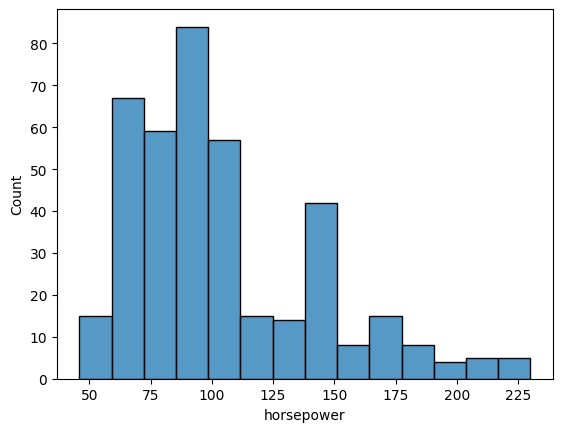

In [15]:
sns.histplot(data=projectdata['horsepower'] )

##### Counter plot

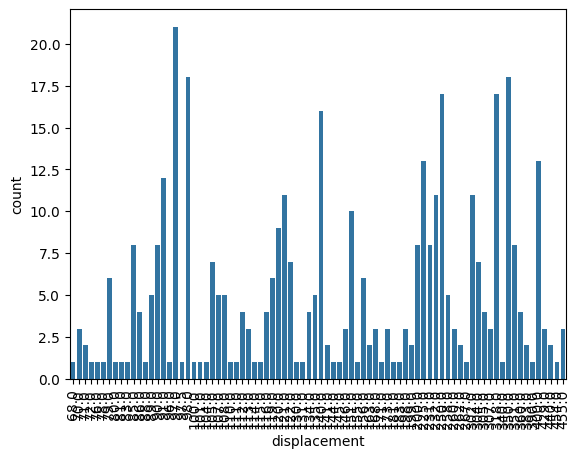

In [22]:
sns.countplot(x=projectdata['displacement'])
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='acceleration', ylabel='count'>

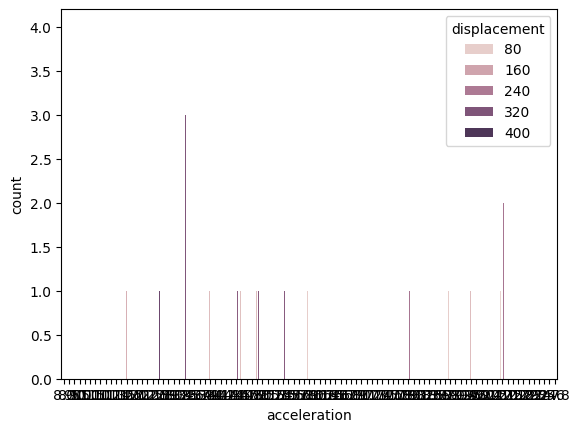

In [26]:
sns.countplot(x=projectdata['acceleration'], hue=projectdata['displacement'])

##### Box plot

<Axes: xlabel='model_year'>

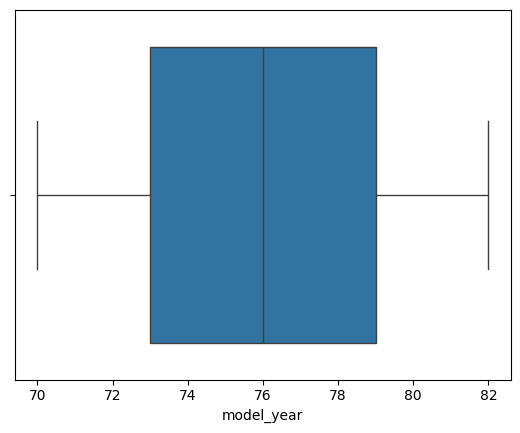

In [24]:
sns.boxplot(data=projectdata, x='model_year')

#### Bivariate Data visualization

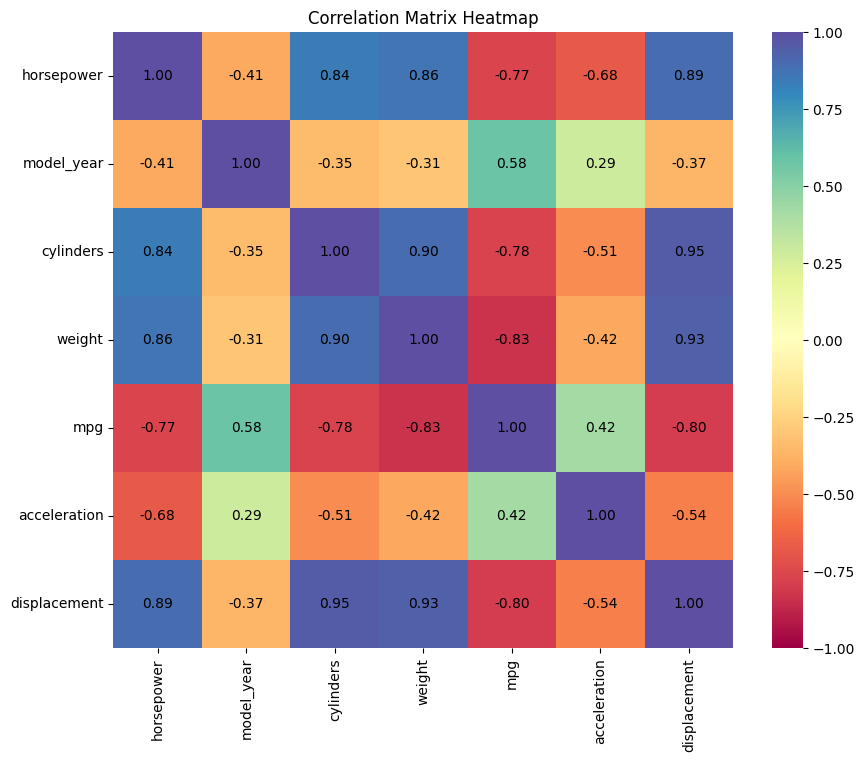

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_cols = ['horsepower', 'model_year', 'cylinders', 'weight', 'mpg', 'acceleration', 'displacement']

# Create the correlation matrix
corr_matrix = projectdata[corr_cols].corr()

# Create a heatmap without annotations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cmap="Spectral")

# Add annotations manually
for i in range(len(corr_cols)):
    for j in range(len(corr_cols)):
        text = f"{corr_matrix.iloc[i, j]:.2f}"
        plt.text(j + 0.5, i + 0.5, text, ha='center', va='center', color='black', fontsize=10)

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()


### Find correlations between different columns

In [20]:
corr_cols = ['horsepower', 'model_year', 'cylinders', 'weight', 'mpg', 'acceleration', 'displacement']

# Calculate the correlation matrix
correlation_matrix = projectdata[corr_cols].corr()

# Display the correlation matrix
print(correlation_matrix)

              horsepower  model_year  cylinders    weight       mpg  \
horsepower      1.000000   -0.411651   0.838939  0.860574 -0.771437   
model_year     -0.411651    1.000000  -0.348746 -0.306564  0.579267   
cylinders       0.838939   -0.348746   1.000000  0.896017 -0.775396   
weight          0.860574   -0.306564   0.896017  1.000000 -0.831741   
mpg            -0.771437    0.579267  -0.775396 -0.831741  1.000000   
acceleration   -0.684259    0.288137  -0.505419 -0.417457  0.420289   
displacement    0.893646   -0.370164   0.950721  0.932824 -0.804203   

              acceleration  displacement  
horsepower       -0.684259      0.893646  
model_year        0.288137     -0.370164  
cylinders        -0.505419      0.950721  
weight           -0.417457      0.932824  
mpg               0.420289     -0.804203  
acceleration      1.000000     -0.543684  
displacement     -0.543684      1.000000  


### Provide your insights on what variables affect the fuel efficiency of automobiles.ations.


##### Horsepower: There was a negative correlation of -0.77 between horsepower and fuel efficiency (mpg) indicating that as horsepower increases, fuel efficiency tends to decrease. This implies that increasing horsepower of vehicles more often possesses larger, powerful engines, leading to increased fuel consumption of the vehicle.

##### Cylinders: The number of cylinders in the data reflected a substantial negative correlation of -0.78 with fuel efficiency. The number of cylinders of a vehicle typically signifies a larger and more powerful engine, contributing to reduced fuel efficiency in such vehicles.

##### Weight: The weight of a vehicle in the data gave a negative correlation of -0.83 between vehicle weight and fuel efficiency showing that heavier vehicles demand more energy to move and perform well, this causes a high consumption of fuel resulting in diminished fuel efficiency.

##### Displacement: Engine displacement exhibits a marked negative correlation of -0.80 with fuel efficiency. Larger engine displacements often indicate bigger and more powerful engines, leading to lower fuel efficiency in such vehicles.

##### Acceleration: The correlation between acceleration and fuel efficiency reflected a  positive at 0.42 trend. This suggests that vehicles with higher acceleration may demonstrate better fuel efficiency. However, this positive correlation is misleading because is less robust than the negative correlations for the other specifications.


## Part 2

###  Fit Regression models on the data to predict the fuel efficiency of cars:

#### Split the dataset into Training and Test sets.

In [21]:
X = projectdata.drop(['mpg', 'car_name'], axis=1)  
y = projectdata['mpg'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error on the test data
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error on test data is: {:.2f}'.format(mse))


Mean Squared Error on test data is: 8.95


### Which of the above measures is more relevant for this problem statement?

##### The data structure for this modeling best fits the Fit Linear Regression model as compared to calculating the accuracy for training and test data. The data representation will be well modeled using the Fit Linear Regressions, in the modeling, the mean squared error on the test data is : 8.95. means that on average the squared difference between the predicted and actual values is 8.95.  This indicates that there is more room for improving the model's predictive accuracy. MSE for the modeling is high, by lowering the MSE to a significantly lower value will be more desirable.    